In [2]:
!conda install -c conda-forge matplotlib scikit-learn -y
#make sure to add bang (!)
#if running install in jupyter notebook make sure to add -your to bypass y/n push

Could not load conda plugin `conda-libmamba-solver`:

dlopen(/Users/riyarampalli/miniforge3/lib/python3.10/site-packages/libmambapy/bindings.cpython-310-darwin.so, 0x0002): Library not loaded: @rpath/libarchive.13.dylib
  Referenced from: <A1C11063-2162-3BE9-8EB8-234003BCB9E4> /Users/riyarampalli/miniforge3/lib/libmamba.2.0.0.dylib
  Reason: tried: '/Users/riyarampalli/miniforge3/lib/libarchive.13.dylib' (no such file), '/Users/riyarampalli/miniforge3/lib/python3.10/site-packages/libmambapy/../../../libarchive.13.dylib' (no such file), '/Users/riyarampalli/miniforge3/lib/python3.10/site-packages/libmambapy/../../../libarchive.13.dylib' (no such file), '/Users/riyarampalli/miniforge3/bin/../lib/libarchive.13.dylib' (no such file), '/Users/riyarampalli/miniforge3/bin/../lib/libarchive.13.dylib' (no such file), '/usr/local/lib/libarchive.13.dylib' (no such file), '/usr/lib/libarchive.13.dylib' (no such file, not in dyld cache)
done
doneing environment: \ 


==> WARNING: A newer version of

In [6]:
#include a few imports that we will need:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.linear_model import LinearRegression

We have been loading and cleaning the iris data by hand up to this point, but now we are going to make use of a nice feature in scikit-learn, which provides the iris data as a pre-loaded dataset.

In [7]:
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# Exploring the data 1-D at a time with histograms¶

Let's say we want to visualize the differences between the different measurements for each of the species. A simple way to do this is with histograms. Here we will use the pd.groupby method to group the data by species ID.

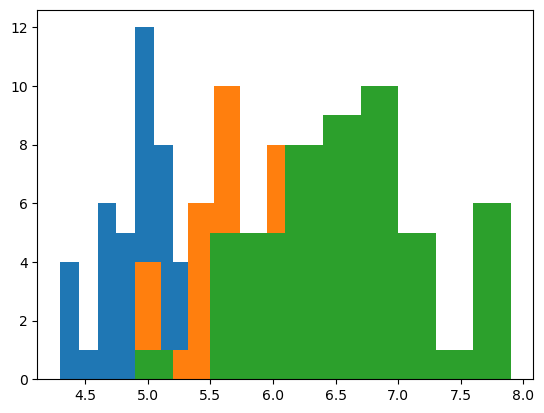

In [8]:
# Define a variable for the feature we wish to plot
feature = "sepal length (cm)"
# Group the data in the dataframe by species ID
gb = iris_df.groupby("species")
# Iterate through the groupby object
for sp, dat in gb:
    # For each species, plot the data for the given feature as a histogram
    plt.hist(dat[feature], label=sp)

# Set the alpha channel¶

The initial result looks good, but hist defaults to plotting all histograms with zero opacity, so it's not clear what is happening in regions where the histograms overlap. Matplotlib plotting functions can take an opacity parameter called alpha which takes values between 0 and 1. Try setting the alpha to a small value and replotting.

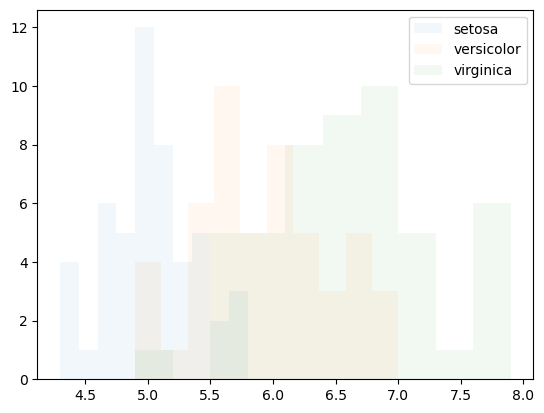

In [14]:
feature = "sepal length (cm)"
gb = iris_df.groupby("species")
for sp, dat in gb:
    plt.hist(dat[feature], label=sp, alpha=0.06) #higher alpha values mean less transparency 
plt.legend()

# Change the colors¶

By default, matplotlib will choose different colors for each histogram, and this is fine, but you might want to control the colors for each histogram to unify color schemes across your plots, and also to beautify them. You can specify colors in several different ways, but the most straightforward way is to pick from the large list of matplotlib named colors. Here are some examples:

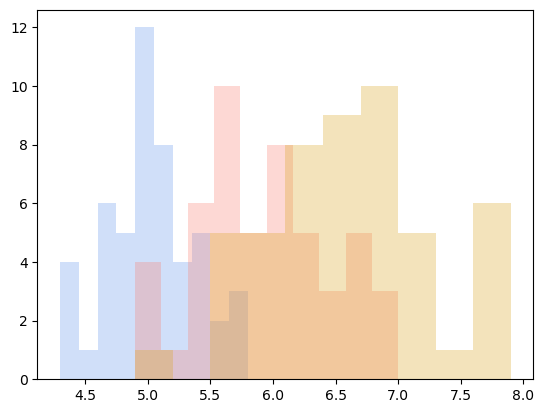

In [18]:
feature = "sepal length (cm)"
gb = iris_df.groupby("species")
# Create a dictionary mapping species IDs to color names, which we will access inside the for loop
cdict = {'setosa':'cornflowerblue',
         'versicolor':'salmon',
         'virginica':'goldenrod'}
for sp, dat in gb:
    plt.hist(dat[feature], label=sp, alpha=0.3, color=cdict[sp])

# Add a legend¶

If you add labels to the hist call (as we have done), then matplotlib can easily generate a legend for your figure with the plt.legend() method.

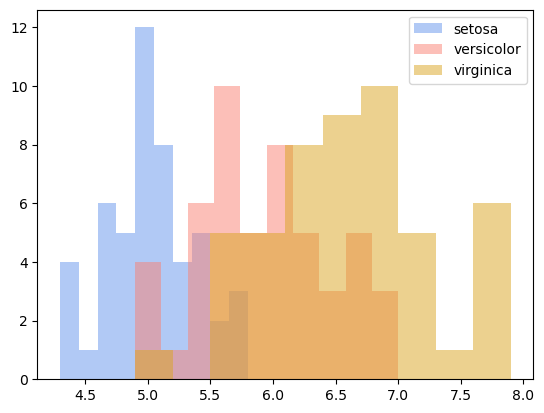

In [19]:
feature = "sepal length (cm)"
gb = iris_df.groupby("species")
cdict = {'setosa':'cornflowerblue',
         'versicolor':'salmon',
         'virginica':'goldenrod'}
for sp, dat in gb:
    plt.hist(dat[feature], label=sp, alpha=0.5, color=cdict[sp])
plt.legend()

# Add axis labels and title¶

Finally, we will wrap up this figure by providing axis labels and a plot title, which we can do with the plt.title(), and plt.xlabel()/plt.ylabel() methods.




Text(0.5, 0, 'sepal length (cm)')

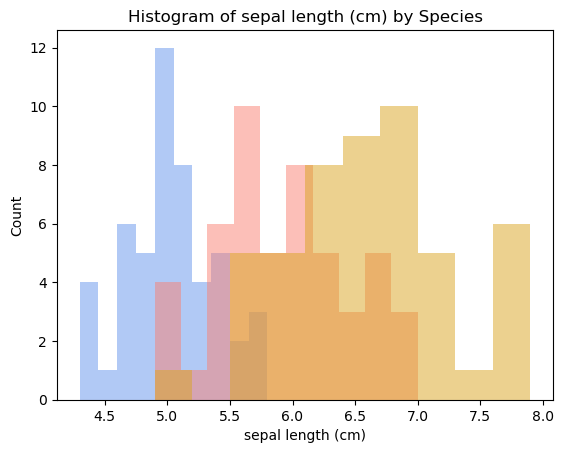

In [20]:
feature = "sepal length (cm)"
gb = iris_df.groupby("species")
cdict = {'setosa':'cornflowerblue',
         'versicolor':'salmon',
         'virginica':'goldenrod'}
for sp, dat in gb:
    plt.hist(dat[feature], label=sp, alpha=0.5, color=cdict[sp])

plt.title(f'Histogram of {feature} by Species')
plt.ylabel('Count')
plt.xlabel(feature)

# Saving figures to a file¶

Once you are happy with your figure, you can either right-click on the image in the notebook and "copy output to clipboard", but this will copy a low-res version of the image, which is fine for presentations but not great for publications. For this reason matplotlib provides a savefig() method for saving the resulting figure in several different possible output formats, also allowing to control the output resolution (using the dpi argument, for example). Here is an example of saving as a standard resolution PNG file.



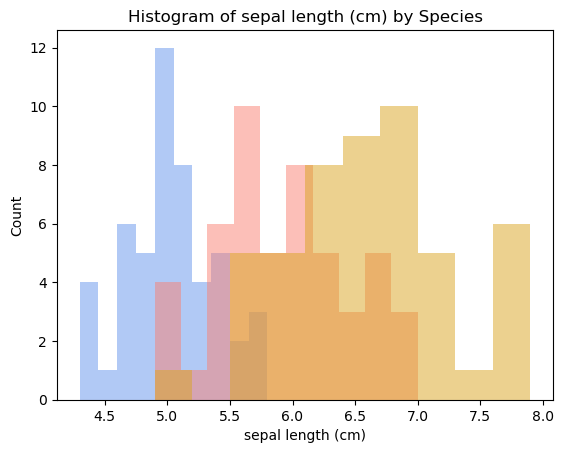

In [26]:
feature = "sepal length (cm)"
gb = iris_df.groupby("species")
cdict = {'setosa':'cornflowerblue',
         'versicolor':'salmon',
         'virginica':'goldenrod'}
for sp, dat in gb:
    plt.hist(dat[feature], label=sp, alpha=0.5, color=cdict[sp])

plt.title(f'Histogram of {feature} by Species')
plt.ylabel('Count')
plt.xlabel(feature) #can I define x axis here? do I need to use feature? 
plt.savefig('sepal_length.raw')

In [22]:
plt.gcf().canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format',
 'webp': 'WebP Image Format'}

<Figure size 640x480 with 0 Axes>